<a href="https://colab.research.google.com/github/IngerMasha/week14/blob/main/day4/Exercises_XP_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


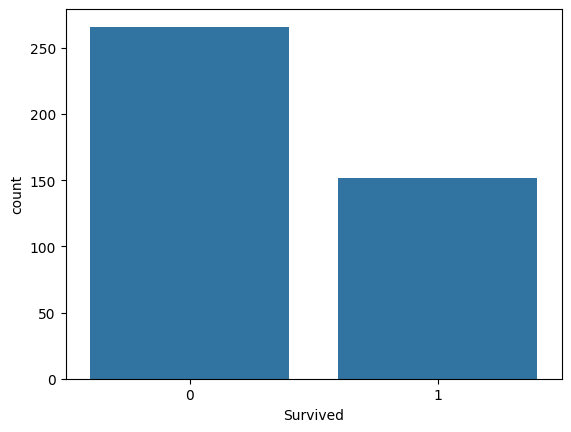

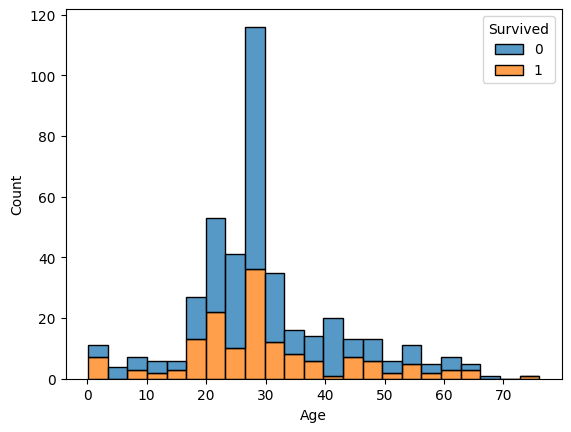

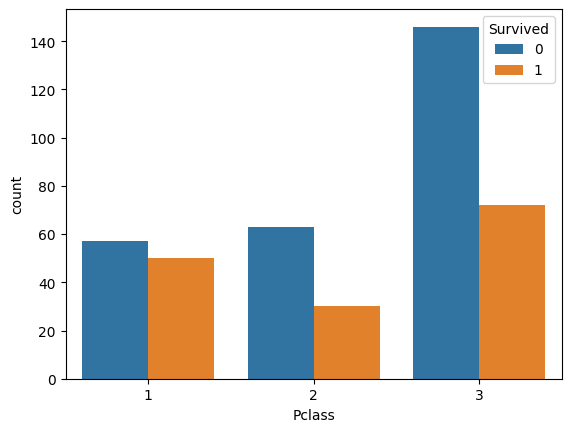

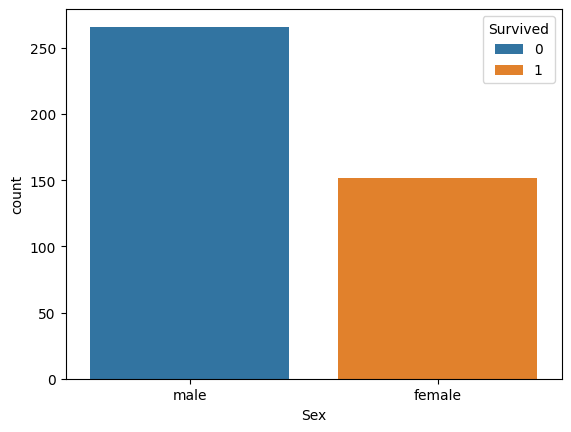

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv('/content/tested.csv')

print(titanic.head())

titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

titanic.drop(columns=['Cabin'], inplace=True)

sns.countplot(x='Survived', data=titanic)
plt.show()

sns.histplot(data=titanic, x='Age', hue='Survived', multiple='stack')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.show()

sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'])

X = titanic.drop(columns=['Survived', 'Name', 'Ticket'])
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_clf = grid_search.best_estimator_

y_pred_gs = best_clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_gs)}")
print(f"Precision: {precision_score(y_test, y_pred_gs)}")
print(f"Recall: {recall_score(y_test, y_pred_gs)}")
print(f"F1 Score: {f1_score(y_test, y_pred_gs)}")


Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Предполагается, что вы уже загрузили и обработали данные (например, X и y уже определены)

# Проверяем, есть ли пропущенные значения в X
print(X.isnull().sum())

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn)}")
print(f"Recall: {recall_score(y_test, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn)}")


PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64
Accuracy: 0.6190476190476191
Precision: 0.5555555555555556
Recall: 0.29411764705882354
F1 Score: 0.3846153846153846


In [6]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_search_knn.fit(X_train, y_train)

print(f"Best parameters: {grid_search_knn.best_params_}")
best_knn = grid_search_knn.best_estimator_

y_pred_knn_gs = best_knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_gs)}")
print(f"Precision: {precision_score(y_test, y_pred_knn_gs)}")
print(f"Recall: {recall_score(y_test, y_pred_knn_gs)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn_gs)}")


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Accuracy: 0.7023809523809523
Precision: 0.7142857142857143
Recall: 0.4411764705882353
F1 Score: 0.5454545454545455


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print(f"Precision: {precision_score(y_test, y_pred_nn)}")
print(f"Recall: {recall_score(y_test, y_pred_nn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_nn)}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6385 - loss: 31.2124 - val_accuracy: 0.6716 - val_loss: 17.5129
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6341 - loss: 16.2125 - val_accuracy: 0.7015 - val_loss: 4.5413
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6665 - loss: 2.7694 - val_accuracy: 0.3284 - val_loss: 4.9437
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5026 - loss: 3.1938 - val_accuracy: 0.6866 - val_loss: 2.2763
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6494 - loss: 2.6831 - val_accuracy: 0.6418 - val_loss: 1.2818
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5953 - loss: 1.7268 - val_accuracy: 0.6418 - val_loss: 1.2203
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6458 - loss: 1.4153 - val_accuracy: 0.6269 - val_loss: 1.1319
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6729 - loss: 1.1886 - val_accuracy: 0.6269 - val_loss: 1.0162
Epoc

In [10]:
!pip install tensorflow keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00
